## Installing Libreries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import imblearn
import time
from tqdm import tqdm
# Maths
import math
from numpy import mean , std
from collections import Counter

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [3]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN,NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [167]:
# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict,cross_val_score, RepeatedStratifiedKFold, StratifiedShuffleSplit

from   sklearn.linear_model import LogisticRegression, LinearRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.svm import SVC
from   sklearn.linear_model import SGDClassifier

from xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   sklearn.naive_bayes import GaussianNB
from   sklearn.neighbors import KNeighborsClassifier
#from   imblearn.over_sampling import RandomOverSampler
import pickle

#Clasturing 
from sklearn.cluster import KMeans

# Evalution
from   sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve, auc, f1_score
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

#plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead

In [5]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

# Random State
RANDOM_STATE = 605039 # my loving number

# Data input

In [6]:
df = pd.read_csv("modified_BA_flight_data_15092024.csv", index_col='Unnamed: 0')

In [7]:
#sns.pairplot(data=df, hue= 'booking_complete' )
#plt.show()

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52,0


# Target variable 

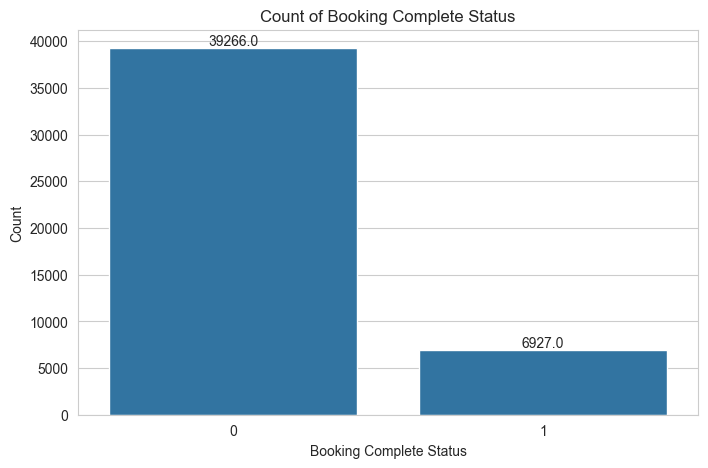

In [9]:
plt.figure(figsize=(8,5))
f = sns.countplot( data = df,x= 'booking_complete')
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Booking Complete Status")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Count of Booking Complete Status")  # Title reflecting the actual plot
plt.show()

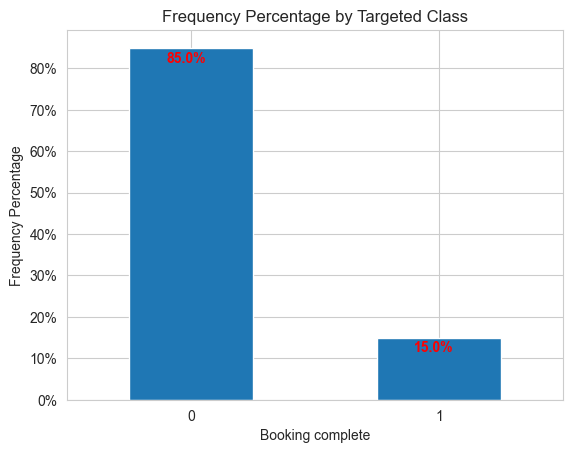

In [10]:
ax = (df['booking_complete'].value_counts() /len(df)*100).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Frequency Percentage')
ax.set_xlabel('Booking complete')
ax.set_title('Frequency Percentage by Targeted Class')
totals = []  # list to collect the plt.patches data
# values and append to list
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)  # setting individual bar lables using above list
for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
  str(round((i.get_height()/total), 1))+'%', color='red', weight = 'bold')
plt.grid(True)
plt.show()

# 

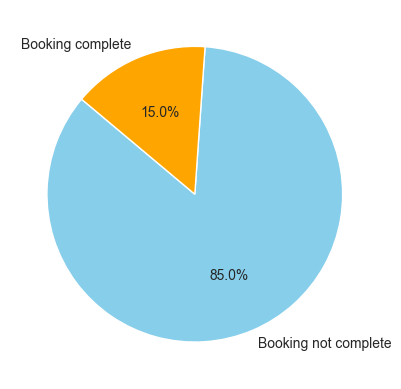

In [11]:
labels=["Booking not complete","Booking complete"]

complete_or_not = df['booking_complete'].value_counts().tolist()
values = [complete_or_not[0],complete_or_not[1]]

fig = plt.pie(x=  df['booking_complete'].value_counts(), labels=labels, startangle=140, autopct='%1.1f%%', colors=["skyblue","orange"], pctdistance=0.6, labeldistance=1.1, radius=1.0)

#fig = plt.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
plt.title="Fraud vs Genuine transactions"
plt.show()

To deal with the problem of imbalanced data need resampling the data.
Over-Sampling:
In this technique, the minority classes are randomly duplicated in order to match the number of majority classes.

 - The Precision-Recall curve is particularly useful in evaluating models for imbalanced datasets.
- It’s important to note that when resampling the training data, we should never evaluate the model on the resampled data, as it can lead to overfitting to the resampled distribution.


# Define the target 

In [12]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


In [13]:
# Define the target 
X= df.drop('booking_complete', axis=1)
Y= df['booking_complete']

In [14]:
X.shape

(46193, 13)

In [15]:
Y.shape

(46193,)

In [16]:
type(Y)

pandas.core.series.Series

# Workflow

**Workflow with Stratified Splitting**

Step 1: Use stratified train-test split to maintain class proportions

step 2: Encode categorical variables (e.g., One-Hot Encoding, Label Encoding).

Step 3: Check the class distribution in the training set (proportions will be preserved)

Step 4: Apply  oversampling/Under Sampling  only to the training set

Step 5: Scale the data using a technique like StandardScaler or MinMaxScaler.

Step 6: Check the new class distribution after oversampling

Step 7: Train the model on the resampled training set

Step 8: Evaluate the model on the original test set


# Data spliting

In imbalanced datasets, oversampling or undersampling should be performed to balace the sample only on the training set after splitting the data, not on the entire dataset. 

In [17]:
#split_test_val = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state= 39)

In [18]:
#split_test_val.split(X,Y)

In [19]:
# Check if X and Y are pandas DataFrames
#print(type(X), type(Y))

In [20]:
# Using Stratifeid sampling
#stratified splitting, typically stratify based on the target variable 
#70% (train), 15% (validation), and 15% (test)

# 1st split to train and test with validation


split_test = StratifiedShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
for train_index , test_val_index in split_test.split(X,Y):
    X_train, X_test_val = X.iloc[train_index], X.iloc[test_val_index]
    Y_train, Y_test_val = Y.iloc[train_index], Y.iloc[test_val_index]
    


In [21]:
# 2nd split to test set to test and validation set
split_val = StratifiedShuffleSplit(n_splits=1, train_size=0.5, random_state=42)
for test_index , val_index in split_val.split(X_test_val,Y_test_val):
    X_test, X_val = X_test_val.iloc[test_index], X_test_val.iloc[val_index]
    Y_test, Y_val = Y_test_val.iloc[test_index], Y_test_val.iloc[val_index]

In [22]:
Y_test.shape

(6929,)

In [23]:
X_test.shape

(6929, 13)

In [24]:
X_train.shape

(32335, 13)

In [25]:
Y_train.shape

(32335,)

In [26]:
X_val.shape

(6929, 13)

In [27]:
Y_val.shape

(6929,)

# Feature Engineering

In [28]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


## Catagorical encoding

In [29]:
print(df['sales_channel'].unique())
print(df['trip_type'].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']


### OneHot Encoding 

In [30]:
# OneHotEncoder for 'sales_channel' and 'trip_type'
def cat_onehot(train,test,val,column):
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False for dense matrix ; drop='first' to avoid dummy variable trap
    
    # Fit and transform the column
    train_encoded = encoder.fit_transform(train[[column]])
    # transform the test column
    test_encoded = encoder.transform(test[[column]])
    val_encoded = encoder.transform(val[[column]])
    # Create a DataFrame with the encoded values and new column names ## Get feature names from the encoder
    train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out([column]))
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out([column]))
    val_encoded_df = pd.DataFrame(val_encoded, columns=encoder.get_feature_names_out([column]))
    
    # Reset index to match the original data's index
    train_encoded_df.index = train.index
    test_encoded_df.index = test.index
    val_encoded_df.index = val.index
    
    # new column put into main dataset
    train_ = pd.concat([train,train_encoded_df], axis=1)
    test_ = pd.concat([test,test_encoded_df], axis=1)
    val_ = pd.concat([val,val_encoded_df], axis=1)
    # Return the DataFrame with OneHotEncoded columns
    return train_ , test_, val_

In [31]:
# need validation set encoding

In [32]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'sales_channel')


In [33]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'trip_type')
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
34225,2,Internet,RoundTrip,21,4,15,7,PENPUS,South Korea,0,0,0,6.33,0.0,0.0,1.0
33996,1,Internet,RoundTrip,60,4,4,2,others,China,0,0,0,8.83,0.0,0.0,1.0
38528,1,Internet,RoundTrip,160,5,12,3,HKTSYD,Australia,0,0,1,8.58,0.0,0.0,1.0
49914,2,Internet,RoundTrip,206,6,12,6,PENTPE,Malaysia,0,0,0,4.67,0.0,0.0,1.0
44587,3,Internet,RoundTrip,401,6,13,7,DMKKIX,Thailand,1,0,0,7.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,1,Internet,RoundTrip,2,2,1,1,others,Malaysia,0,1,0,6.42,0.0,0.0,1.0
32522,1,Mobile,RoundTrip,1,4,16,4,ICNJHB,Singapore,1,0,0,6.62,1.0,0.0,1.0
28046,1,Internet,RoundTrip,9,3,4,2,ICNPEN,Japan,1,0,1,6.62,0.0,0.0,1.0
46064,1,Internet,RoundTrip,97,6,2,4,HKGMEL,Australia,1,0,0,8.83,0.0,0.0,1.0


In [34]:
X_test.shape

(6929, 16)

In [35]:
X_val 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
8206,1,Internet,RoundTrip,88,28,10,3,DELMEL,Australia,0,0,0,8.83,0.0,0.0,1.0
44576,1,Internet,RoundTrip,58,6,14,2,DMKKIX,Thailand,1,1,1,7.00,0.0,0.0,1.0
16160,1,Internet,RoundTrip,10,41,4,6,others,Australia,1,1,1,8.83,0.0,0.0,1.0
20992,2,Internet,RoundTrip,3,19,0,4,others,Australia,1,0,1,8.83,0.0,0.0,1.0
6857,1,Mobile,RoundTrip,50,20,7,1,COKSYD,Australia,1,1,1,8.58,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,Internet,RoundTrip,22,33,6,2,others,Australia,0,0,0,8.83,0.0,0.0,1.0
8433,1,Internet,RoundTrip,82,23,11,7,others,Philippines,1,1,1,5.52,0.0,0.0,1.0
453,1,Internet,RoundTrip,119,21,22,7,AKLKUL,Malaysia,0,1,0,8.83,0.0,0.0,1.0
7551,1,Internet,RoundTrip,99,39,11,5,others,Australia,1,1,1,8.83,0.0,0.0,1.0


 Catagorical encoding of High-cardinality categorical variables with many unique categories and large datasets

In [36]:
X_train['route'].nunique()

124

### Frequency encoding

In [37]:

#Frequency encoding is simple and captures how often each category appears in the dataset, which can sometimes correlate with the target in tree-based models.
# Function for frequency encoding with handling for unseen categories
def frequency_encoding(train, test,val, column):
    # Calculate the frequency of each unique value in the 'route' column from the training set
    freq_encoding = train[column].value_counts().to_dict()
    
    # Map the frequencies to the train and test sets
    train[f'{column}_encoded'] = train[column].map(freq_encoding)
    test[f'{column}_encoded'] = test[column].map(freq_encoding)
    val[f'{column}_encoded'] = val[column].map(freq_encoding)
    
    # Handle unseen categories in test set (NaN values) by assigning 0 or a custom value
    test[f'{column}_encoded'].fillna(0, inplace=True)  # Alternatively, you can use train[column].mean() for a more robust fill value.
    val[f'{column}_encoded'].fillna(0, inplace=True)
    
    return train, test, val



In [38]:
# Apply frequency encoding function to X_train and X_test
X_train_encoded, X_test_encoded, X_val_encoded = frequency_encoding(X_train, X_test,X_val,'route')

# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'route_encoded'
print(X_train_encoded[['route', 'route_encoded']].head())


        route  route_encoded
34225  PENPUS             71
33996  others           9877
38528  HKTSYD            258
49914  PENTPE            612
44587  DMKKIX            493


In [39]:
X_val_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded
8206,1,Internet,RoundTrip,88,28,10,3,DELMEL,Australia,0,0,0,8.83,0.0,0.0,1.0,161
44576,1,Internet,RoundTrip,58,6,14,2,DMKKIX,Thailand,1,1,1,7.00,0.0,0.0,1.0,493
16160,1,Internet,RoundTrip,10,41,4,6,others,Australia,1,1,1,8.83,0.0,0.0,1.0,9877
20992,2,Internet,RoundTrip,3,19,0,4,others,Australia,1,0,1,8.83,0.0,0.0,1.0,9877
6857,1,Mobile,RoundTrip,50,20,7,1,COKSYD,Australia,1,1,1,8.58,1.0,0.0,1.0,315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,Internet,RoundTrip,22,33,6,2,others,Australia,0,0,0,8.83,0.0,0.0,1.0,9877
8433,1,Internet,RoundTrip,82,23,11,7,others,Philippines,1,1,1,5.52,0.0,0.0,1.0,9877
453,1,Internet,RoundTrip,119,21,22,7,AKLKUL,Malaysia,0,1,0,8.83,0.0,0.0,1.0,1632
7551,1,Internet,RoundTrip,99,39,11,5,others,Australia,1,1,1,8.83,0.0,0.0,1.0,9877


In [40]:
X_test_encoded[ X_test_encoded['route_encoded'] == 0]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded


### Target Encoding

In [41]:
X_train['booking_origin'].nunique()

27

In [42]:
# Target Encoding is the best option for tree-based models when you have a moderate number of categories (like 27). 
# It captures the relationship between the categories and the target variable.

def target_encoding(train, test, val, Y_train, column):
    # Initialize the target encoder
    target_encoder = ce.TargetEncoder(cols=column)

    # Fit the encoder on the training set (using the target variable Y_train)
    train[f'{column}_encoded']  = target_encoder.fit_transform(train[column], Y_train)

    # Apply the encoding to the test set
    test[f'{column}_encoded']  = target_encoder.transform(test[column])
    
    # Apply the encoding to the validetion set
    val[f'{column}_encoded']  = target_encoder.transform(val[column])
    
    return train, test, val

In [43]:
# Apply Target Encoding function to X_train and X_test
# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'booking_origin'

X_train, X_test, X_val = target_encoding(X_train, X_test,X_val, Y_train,'booking_origin')

print(X_train[['booking_origin', 'booking_origin_encoded']].head())

      booking_origin  booking_origin_encoded
34225    South Korea                0.104502
33996          China                0.203850
38528      Australia                0.047149
49914       Malaysia                0.354983
44587       Thailand                0.237415


In [44]:
print(X_val[['booking_origin', 'booking_origin_encoded']] )

      booking_origin  booking_origin_encoded
8206       Australia                0.047149
44576       Thailand                0.237415
16160      Australia                0.047149
20992      Australia                0.047149
6857       Australia                0.047149
...              ...                     ...
22033      Australia                0.047149
8433     Philippines                0.259258
453         Malaysia                0.354983
7551       Australia                0.047149
35475       Malaysia                0.354983

[6929 rows x 2 columns]


In [45]:
X_train.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded'],
      dtype='object')

In [46]:
X_train.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
34225,2,21,4,15,7,0,0,0,6.33,0.0,0.0,1.0,71,0.104502
33996,1,60,4,4,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.203850
38528,1,160,5,12,3,0,0,1,8.58,0.0,0.0,1.0,258,0.047149
49914,2,206,6,12,6,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
44587,3,401,6,13,7,1,0,0,7.00,0.0,0.0,1.0,493,0.237415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,1,2,2,1,1,0,1,0,6.42,0.0,0.0,1.0,9877,0.354983
32522,1,1,4,16,4,1,0,0,6.62,1.0,0.0,1.0,99,0.280347
28046,1,9,3,4,2,1,0,1,6.62,0.0,0.0,1.0,193,0.123330
46064,1,97,6,2,4,1,0,0,8.83,0.0,0.0,1.0,64,0.047149


In [47]:
X_test.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
38811,2,44,5,0,2,1,1,1,7.57,0.0,0.0,1.0,281,0.123330
33961,1,32,4,13,2,0,1,0,5.62,0.0,0.0,1.0,63,0.259258
21513,1,60,26,7,7,1,0,0,8.83,0.0,0.0,1.0,118,0.047149
4655,1,124,29,6,4,1,0,0,8.83,0.0,0.0,1.0,312,0.047149
10154,1,99,25,16,1,1,1,0,8.58,0.0,0.0,1.0,347,0.237415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,1,51,33,10,1,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
44980,1,6,6,3,4,0,0,0,8.58,0.0,0.0,1.0,347,0.237415
32264,1,51,4,22,5,0,1,0,7.57,1.0,0.0,1.0,281,0.123330
27105,2,66,3,11,1,1,0,0,6.62,0.0,0.0,1.0,198,0.237415


In [48]:
X_val.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_val

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
8206,1,88,28,10,3,0,0,0,8.83,0.0,0.0,1.0,161,0.047149
44576,1,58,6,14,2,1,1,1,7.00,0.0,0.0,1.0,493,0.237415
16160,1,10,41,4,6,1,1,1,8.83,0.0,0.0,1.0,9877,0.047149
20992,2,3,19,0,4,1,0,1,8.83,0.0,0.0,1.0,9877,0.047149
6857,1,50,20,7,1,1,1,1,8.58,1.0,0.0,1.0,315,0.047149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22033,1,22,33,6,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.047149
8433,1,82,23,11,7,1,1,1,5.52,0.0,0.0,1.0,9877,0.259258
453,1,119,21,22,7,0,1,0,8.83,0.0,0.0,1.0,1632,0.354983
7551,1,99,39,11,5,1,1,1,8.83,0.0,0.0,1.0,9877,0.047149


# Resampling Techniques for Balancing

In [49]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [84]:
# Resampling techniques used 
TECHNIQUE_NAME =[ 'overRandomsampling','SMOTE','ADASYN',' underRandomsampling','allknn','NeighbourhoodCleaningRule','Tomek Links']

In [51]:
# function for ploting class balance 
def plot_target_balance(y, TECHNIQUE_NAME):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (7, 5))
    sns.countplot(x = df['booking_complete'], ax = ax1)
    ax1.set_title("Original Target");
    pd.Series(df['booking_complete']).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                                     textprops = {'fontsize' : 10}, ax = ax2,
                                                     title = 'Original distribution')
    sns.countplot(x = y, ax = ax3)
    ax3.set_title(f"{TECHNIQUE_NAME} Target");
    pd.Series(y).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                         textprops = {'fontsize' : 10}, ax = ax4,
                                         title = f"{TECHNIQUE_NAME} distribution")
    ax1.grid(False)
    ax3.grid(False)
    plt.tight_layout()
    plt.show()
    
def plot_scatter(X, y, TECHNIQUE_NAME):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = False, figsize = (10, 4))
    sns.scatterplot(data = df, x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete', ax = ax1)
    ax1.set_title("Original distribution")
    sns.scatterplot(data = pd.concat([X,y], axis = 1),
                     x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete',)
    ax1.grid(False)
    ax2.grid(False)
    ax2.set_title(f"{TECHNIQUE_NAME} distribution")
    plt.show()

## Over Sampling

In [52]:
# Check the class distribution in the training set (proportions will be preserved)
print("Original class distribution:", Counter(Y_train))

Original class distribution: Counter({0: 27486, 1: 4849})


In [53]:
# Apply  oversampling Sampling to the training set
# from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, Y_train)

In [54]:
# Check the new class distribution after oversampling
print("Ouer Resampled class distribution:", Counter(y_over))

Ouer Resampled class distribution: Counter({0: 27486, 1: 27486})


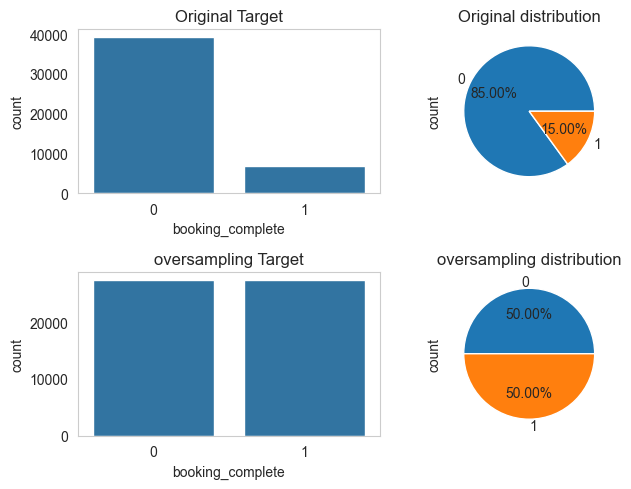

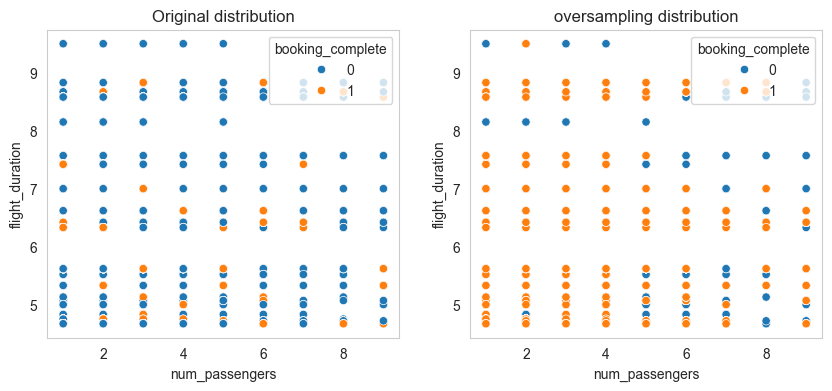

In [55]:
# Visualization of resampling effect
plot_target_balance(y_over, TECHNIQUE_NAME[0])
plot_scatter(X_over, y_over, TECHNIQUE_NAME[0])


## Oversampling: SMOTE

Generating Synthetic Samples: (SMOTE)
SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies.

In [56]:
#from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123)
X_train_sm,Y_train_sm = sm.fit_resample(X_train, Y_train.ravel())

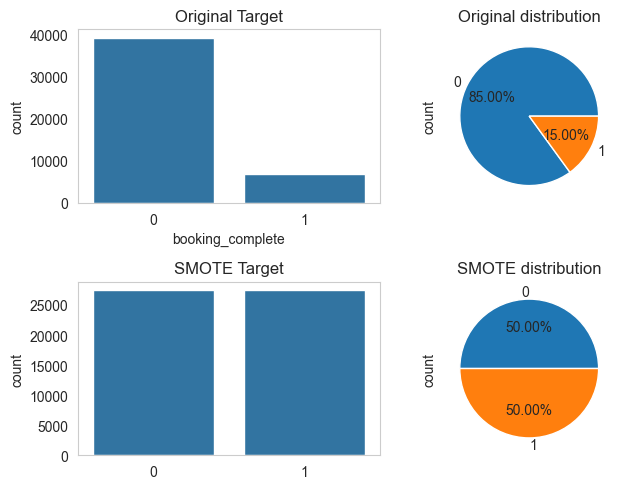

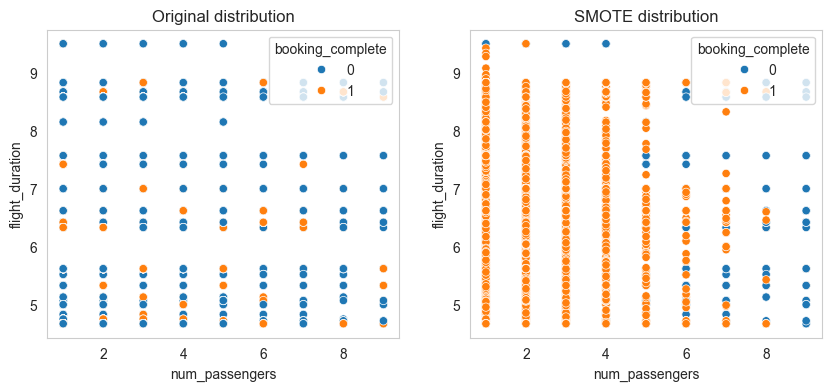

In [85]:
# Visualization of resampling effect
plot_target_balance(Y_train_sm,TECHNIQUE_NAME[1])
# Y_train_res is numpy.ndarray
Y_train_res_df = pd.DataFrame(Y_train_sm, columns=['booking_complete'])
plot_scatter(X_train_sm, Y_train_res_df,TECHNIQUE_NAME[1])

## Oversampling: ADASYN

In [58]:
ada = ADASYN(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = 4)

X_ada, y_ada = ada.fit_resample(X_train,Y_train)

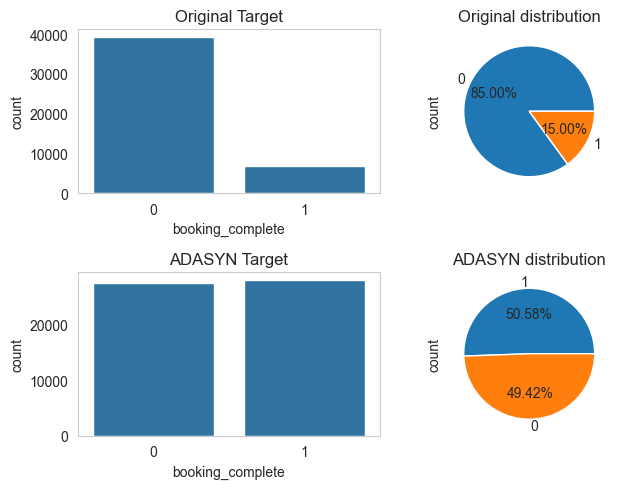

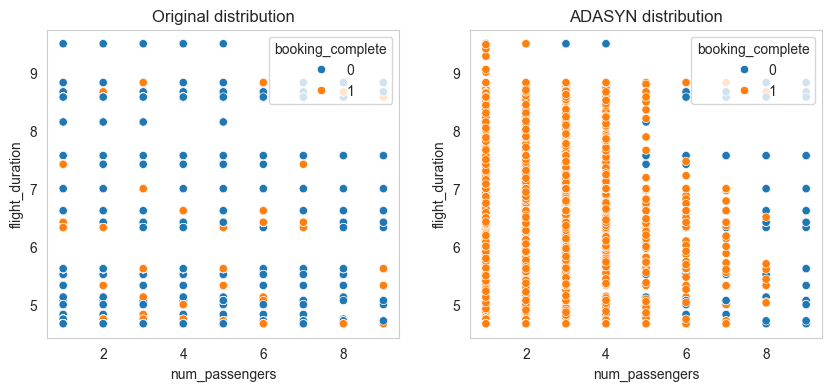

In [86]:
# Visualization of resampling effect
plot_target_balance(y_ada,TECHNIQUE_NAME[2])
# Y_train_res is numpy.ndarray
#Y_train_res_df = pd.DataFrame(Y_train_res, columns=['booking_complete'])
plot_scatter(X_ada, y_ada, TECHNIQUE_NAME[2])

## Under Sampling

Under-Sampling:
In this technique, The majority class are down sampled to the size of minority class by randomly deleting data points from the majority class.

In [60]:
#from imblearn.over_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto')

X_under, y_under = undersample.fit_resample(X_train, Y_train)

# Check the new class distribution after oversampling
print("Under Resampled class distribution:", Counter(y_under))

Under Resampled class distribution: Counter({0: 4849, 1: 4849})


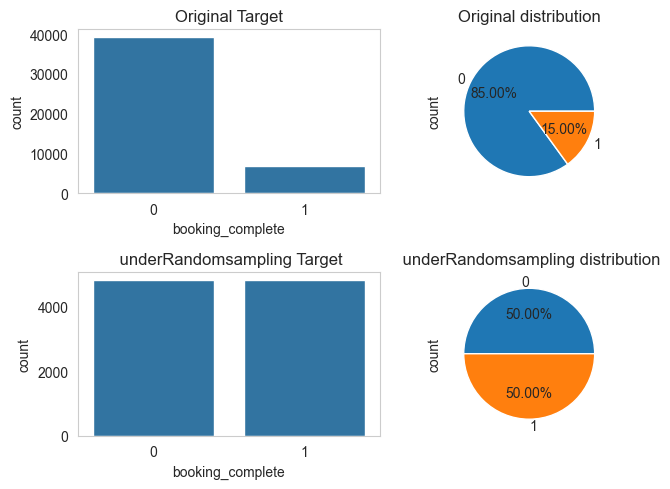

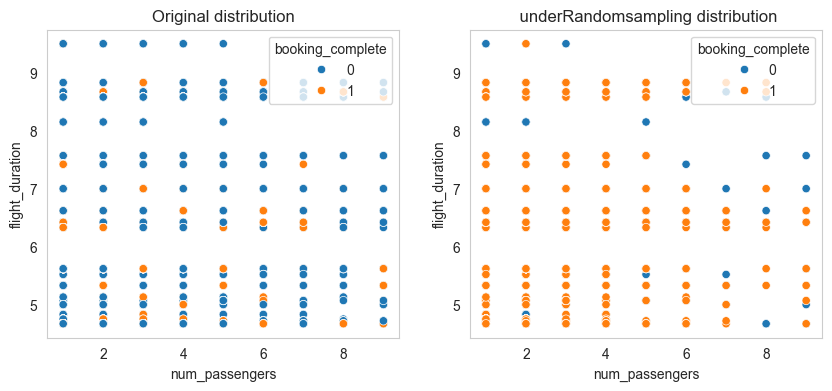

In [87]:
# Visualization of resampling effect
plot_target_balance(y_under, TECHNIQUE_NAME[3])
plot_scatter(X_under, y_under , TECHNIQUE_NAME[3])

## Undersampling: All KNN

All KNN (All k-Nearest Neighbors) is a form of instance selection that involves considering the entire dataset and its nearest neighbors to identify and remove noisy or misclassified instances, thereby enhancing the quality of the training set.

In [62]:


allknn = AllKNN(sampling_strategy = 'auto', kind_sel = 'all',
                n_jobs = -1)

X_allknn , y_allknn  = allknn.fit_resample(X_train, Y_train)

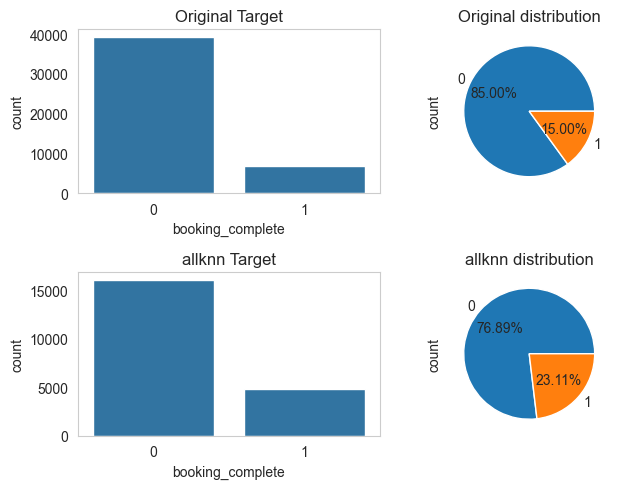

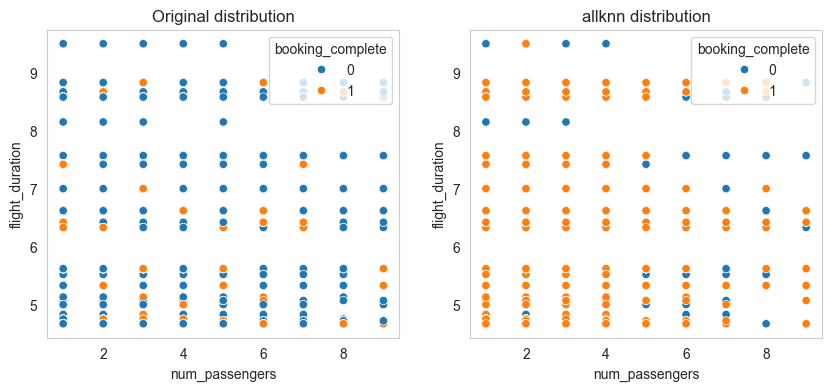

In [63]:
# Visualization of resampling effect
plot_target_balance(y_allknn, TECHNIQUE_NAME[4])
plot_scatter(X_allknn , y_allknn  , TECHNIQUE_NAME[4])

## Undersampling: Neighbourhood Cleaning Rule

NCL is an instance selection method that aims to identify and remove instances that are considered noisy or ambiguous from the dataset, particularly focusing on those instances near class boundaries

In [64]:
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto', kind_sel = 'all',
                                n_jobs = -1) 

X_ncr, y_ncr = ncr.fit_resample(X_train, Y_train)

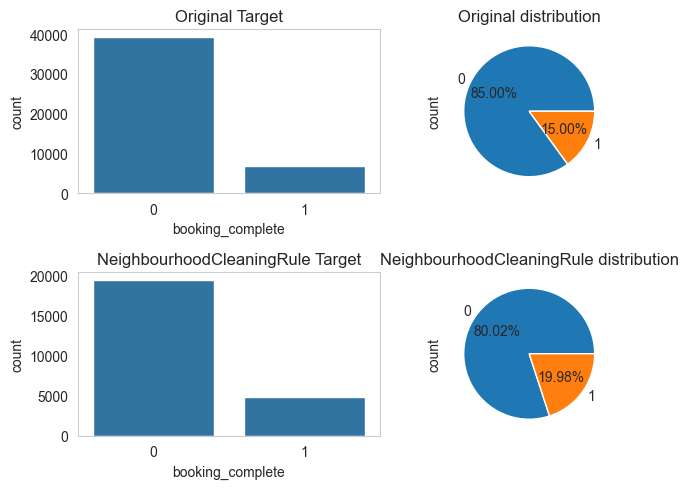

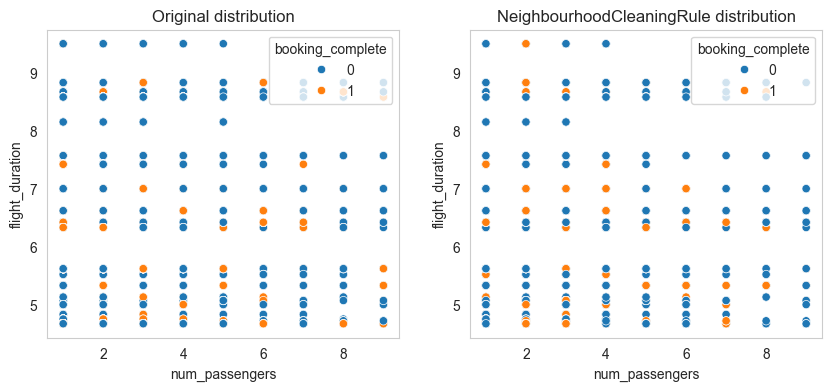

In [65]:
# Visualization of resampling effect
plot_target_balance(y_ncr, TECHNIQUE_NAME[5])
plot_scatter(X_ncr, y_ncr, TECHNIQUE_NAME[5])

In [66]:
X_ncr

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
0,1,60,4,4,2,0,0,0,8.83,0.0,0.0,1.0,9877,0.203850
1,1,160,5,12,3,0,0,1,8.58,0.0,0.0,1.0,258,0.047149
2,2,206,6,12,6,0,0,0,4.67,0.0,0.0,1.0,612,0.354983
3,3,401,6,13,7,1,0,0,7.00,0.0,0.0,1.0,493,0.237415
4,1,79,5,22,7,1,0,1,6.62,0.0,0.0,1.0,150,0.354983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24267,2,202,4,5,5,1,0,0,4.67,0.0,0.0,1.0,612,0.354983
24268,3,222,20,2,1,1,0,1,8.58,0.0,0.0,1.0,127,0.047149
24269,1,2,2,1,1,0,1,0,6.42,0.0,0.0,1.0,9877,0.354983
24270,1,1,4,16,4,1,0,0,6.62,1.0,0.0,1.0,99,0.280347


## Undersampling: Tomek Links

In [67]:
tl = TomekLinks(sampling_strategy = 'auto', n_jobs = -1)  

X_tl, y_tl = tl.fit_resample(X_train, Y_train)

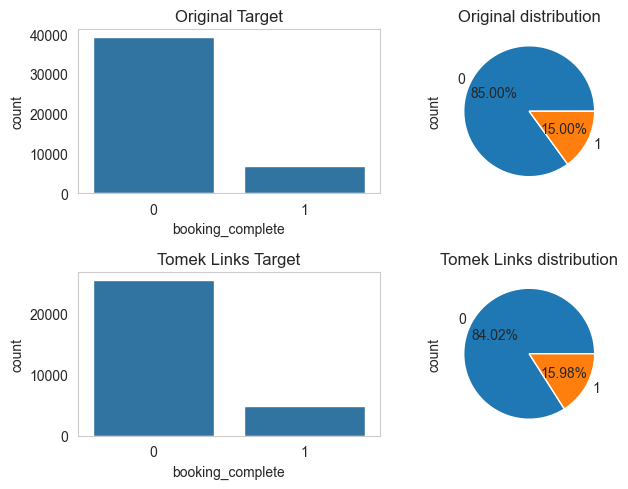

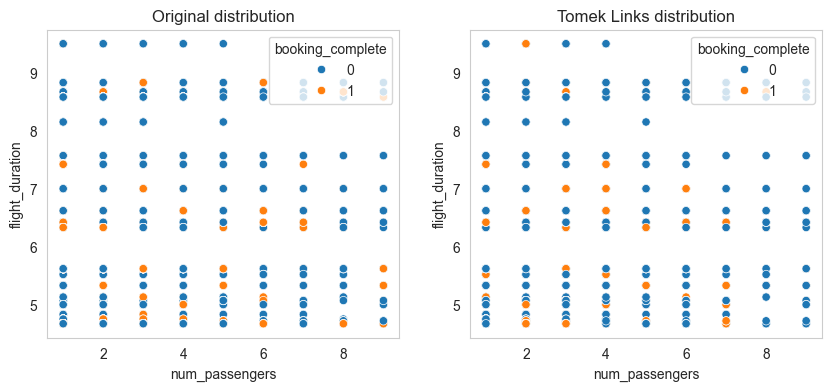

In [68]:
# Visualization of resampling effect
plot_target_balance(y_tl, TECHNIQUE_NAME[6])
plot_scatter(X_tl, y_tl, TECHNIQUE_NAME[6])

# Model

Choose the ML algorithm from 

1. LogisiticRegression
2. DecisionTreeClassifier
3. XGBClassifier
4. LGBMClassifier
5. Support vector Machine
6. Random Forest
7. Support Vector 
8. Naive Bayes
9. Stochastic gradient descent

In [131]:

# Holding arrays
Technique = list()
Type = list()
algorithm = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()

In [70]:
# filter the numerical feature
numeric_features_ = numeric_features.drop('booking_complete')
# Isolated dataset with only numeric coluymns 
X_train_n = X_train[numeric_features_]
X_test_n = X_test[numeric_features_]
X_val_n = X_val[numeric_features_]

categoricals=['sales_channel_Mobile','trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded']

## Scalling

- One-hot encoded data: No scaling is needed.
- Numerically encoded categorical data: Apply scaling (e.g., StandardScaler or MinMaxScaler) If use a distance-based or linear model.
- If use a tree-based algorithm, scaling is not necessary.

In [71]:
X_train[numeric_features_].shape

(32335, 9)

In [72]:
X_over.shape

(54972, 14)

In [73]:
X_train_n.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [74]:
# Scaling function
def scale_data(X_train, X_test, X_val):
    # Using standard scaling
    # Initialize the scaler
    scaler = StandardScaler()
    # Fit the scaler on the training set
    scaler.fit( X_train[numeric_features_])

    # Transform the test and validation sets using the same scaler
    X_train_scaled= scaler.transform( X_train[numeric_features_])
    X_test_scaled = scaler.transform( X_test[numeric_features_])
    X_val_scaled = scaler.transform( X_val[numeric_features_] )
    
    # Convert the scaled arrays back to DataFrames with original column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_n.columns, index=  X_train[numeric_features_].index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_n.columns, index=  X_test[numeric_features_].index)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns= X_val_n.columns, index= X_val[numeric_features_].index)
    
    # Concat numerical and categorical data
    X_train_ = pd.concat([X_train_scaled,X_train[categoricals]], axis=1)
    X_test_ = pd.concat([X_test_scaled,X_test[categoricals]], axis=1)
    X_val_ = pd.concat([X_val_scaled,X_val[categoricals]], axis=1)
    
    return X_train_, X_test_, X_val_

In [75]:
# Machine learning model implimentation
def train_model(X, y):
    model = RandomForestClassifier(random_state = RANDOM_STATE)
    model.fit(X, y)
    return model

In [76]:
#Evaluation matrics
def capture_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    proba_prediction = model.predict_proba(X_test)
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary')]

In [155]:
def get_results(x_train, y_train, x_test, y_test, x_val, Y_val, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str ):
    
    start = time.time()
    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(x_train,x_test, x_val)
    
    print("Training...")
    model = train_model(x_train_, y_train)
    
    print("Metrics...")
    metrics = capture_metrics(model,x_test_, y_test)
    
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    #algorithm.append(algorithm_name)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
    
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)

In [171]:
def create_summary():
    
    return pd.DataFrame({"Algorithm": Algo,"Technique" : Technique, "Type": Type, "AUC SCORE" : auc_score,
                         "Accuracy" : accuracy, "Precision" : precision, "Recall" : recall,
                         "F1 Score" : f1_Score, 
                         #"Time to transform": algorithm_duration, 
                         "Training time":training_duration
                         })

## Base Model Run 

In [195]:
# Make a Technic name dataframe for loop operation
sampling_type = pd.DataFrame(
    {'Technique':['Original','Over', 'Over', 'Over', 'Under', 'Under', 'Under', 'Under'],
    'Type':['Original','OverRandomsampling','SMOTE','ADASYN','UnderRandomsampling','allknn','NeighbourhoodCleaningRule','TomekLinks'] ,
    'X_train_name': ['X_train','X_over', 'X_train_sm', 'X_ada', 'X_under', 'X_allknn', 'X_ncr', 'X_tl'],
    'Y_train_name': ['Y_train','y_over', 'Y_train_sm', 'y_ada', 'y_under', 'y_allknn', 'y_ncr', 'y_tl']}
    
)

In [183]:
# Holding arrays
Technique = list()
Type = list()
algorithm = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()
Algo =list()
CV_score = list()

In [158]:
for i in tqdm(range(len(sampling_type))):
    get_results(globals()[sampling_type.X_train_name[i]] , globals()[sampling_type.Y_train_name[i]] , X_test, Y_test, X_val, Y_val, sampling_type.Technique[i] , sampling_type.Type[i] )

  0%|          | 0/8 [00:00<?, ?it/s]

Scaling...
Training...


 12%|█▎        | 1/8 [00:02<00:15,  2.24s/it]

Metrics...
Complete!
Duration: 2.2445616722106934
Scaling...
Training...
Metrics...


 25%|██▌       | 2/8 [00:05<00:17,  2.96s/it]

Complete!
Duration: 3.4333479404449463
Scaling...
Training...
Metrics...


 38%|███▊      | 3/8 [00:10<00:18,  3.66s/it]

Complete!
Duration: 4.4827446937561035
Scaling...
Training...
Metrics...


 50%|█████     | 4/8 [00:14<00:16,  4.03s/it]

Complete!
Duration: 4.5689311027526855
Scaling...
Training...


 62%|██████▎   | 5/8 [00:15<00:08,  2.90s/it]

Metrics...
Complete!
Duration: 0.9127213954925537
Scaling...
Training...


 75%|███████▌  | 6/8 [00:17<00:04,  2.46s/it]

Metrics...
Complete!
Duration: 1.5959362983703613
Scaling...
Training...
Metrics...


 88%|████████▊ | 7/8 [00:19<00:02,  2.24s/it]

Complete!
Duration: 1.7980294227600098
Scaling...
Training...


100%|██████████| 8/8 [00:21<00:00,  2.24s/it]

Metrics...
Complete!
Duration: 2.21642804145813


100%|██████████| 8/8 [00:21<00:00,  2.66s/it]


In [159]:
SUMMARY = create_summary()
SUMMARY 

,Technique,Type,AUC SCORE,Accuracy,Precision,Recall,F1 Score,Training time
0,Original,Original,0.760684,0.851061,0.515021,0.115496,0.188679,2.244562
1,Over,OverRandomsampling,0.763210,0.838361,0.431239,0.244466,0.312039,3.433348
2,Over,SMOTE,0.753498,0.807187,0.354269,0.347449,0.350826,4.482745
3,Over,ADASYN,0.753211,0.803435,0.346337,0.350337,0.348325,4.568931
4,Under,UnderRandomsampling,0.762785,0.686535,0.285822,0.727623,0.410423,0.912721
5,Under,allknn,0.768015,0.803291,0.365449,0.423484,0.392332,1.595936
6,Under,NeighbourhoodCleaningRule,0.769543,0.834464,0.430412,0.321463,0.368044,1.798029
7,Under,TomekLinks,0.764291,0.847453,0.473054,0.152069,0.230153,2.216428


Index(['AUC SCORE', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], dtype='object')

## Various model 

In [163]:
# for ML model call
def get_models():
  models = dict()
  models['XGB'] = XGBClassifier()
  models['LGBM'] = LGBMClassifier()
  models['logr'] = LogisticRegression(solver='newton-cholesky', max_iter=1000) #Assigning Class Weights for imbalance classicication
  models['knn'] = KNeighborsClassifier()
  models['cart']= DecisionTreeClassifier()
  models['rnf'] = RandomForestClassifier()
  models['svc'] = SVC(gamma='auto')
  models['bayes'] = GaussianNB()
  models['SGD'] = SGDClassifier(loss='modified_huber', random_state=42)

  return models

In [196]:
# Machine learning model implimentation with various algorithm
# Modified  function to run any type of estimetor
def train_model(X, y, estimetor):
    
    return estimetor.fit(X, y)

In [187]:
# Modified function to run any type of estimetor
def get_results(x_train, y_train, x_test, y_test, x_val, Y_val, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str, estimetor ):
    
    start = time.time()
    print("Scaling...")
    x_train_, x_test_, x_val_ = scale_data(x_train,x_test, x_val)
    
    print("Training...")
    model = train_model(x_train_, y_train,estimetor) # add algorithm , 
    
    print("Metrics...")
    metrics = capture_metrics(model,x_test_, y_test, estimetor)
    
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    #algorithm.append(algorithm_name)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
    CV_score.append(mean(metrics[5]))
    
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)

In [188]:
#Evaluation matrics
# Modified function 
def capture_metrics(model, X_test, y_test, estimetor):
    Cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=28)
    prediction = cross_val_predict(estimetor,X_test, y_test, cv=Cv)
    proba_prediction = model.predict_proba(X_test)
    
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary'),
             cross_val_score(estimetor,X_test, y_test,scoring='f1', cv= Cv)]

In [ ]:
#XGBClassifier , LGBMClassifier, KNeighborsClassifier ,  DecisionTreeClassifier , RandomForestClassifier, SVC , GaussianNB , SGDClassifier

In [189]:
def create_summary():
    
    return pd.DataFrame({"Algorithm": Algo,"Technique" : Technique, "Type": Type, "AUC SCORE" : auc_score,
                         "Accuracy" : accuracy, "Precision" : precision, "Recall" : recall,
                         "F1 Score" : f1_Score, 
                         "CV_score" : CV_score,
                         #"Time to transform": algorithm_duration, 
                         "Training time":training_duration
                         })

In [ ]:
# Making confusion matrix
for i in tqdm(range(len(sampling_type))):
  for name, estimetor in models.items():
    fit_model = train_model(globals()[sampling_type.X_train_name[i]], globals()[sampling_type.Y_train_name[i]], estimetor) # add algorithm , 
    Y_pre = cross_val_predict(fit_model,X_test, Y_test, cv=5)
    confusion_matrix = multilabel_confusion_matrix(Y_train,Y_pre)
    print(name,confusion_matrix  )

In [190]:
# Temporary use
def get_models():
  models = dict()
  #models['XGB'] = XGBClassifier()
  #models['LGBM'] = LGBMClassifier()
  models['logr'] = LogisticRegression(solver='newton-cholesky', max_iter=1000) #Assigning Class Weights for imbalance classicication
  #models['knn'] = KNeighborsClassifier()
  models['cart']= DecisionTreeClassifier()
  models['rnf'] = RandomForestClassifier()
  #models['svc'] = SVC(gamma='auto')
  #models['bayes'] = GaussianNB()
 # models['SGD'] = SGDClassifier(loss='modified_huber', random_state=42)

  return models

In [170]:
models = get_models()

In [191]:
for name, model in models.items():
    print(model)

LogisticRegression(max_iter=1000, solver='newton-cholesky')
DecisionTreeClassifier()
RandomForestClassifier()


In [ ]:
for name, estimetor in models.items():
    for i in tqdm(range(len(sampling_type))):
        get_results(globals()[sampling_type.X_train_name[i]] , globals()[sampling_type.Y_train_name[i]] , X_test, Y_test, X_val, Y_val, sampling_type.Technique[i] , sampling_type.Type[i], estimetor )
        Algo.append(name)
        

In [193]:
SUMMARY2 = create_summary()
SUMMARY2 

,Algorithm,Technique,Type,AUC SCORE,Accuracy,Precision,Recall,F1 Score,CV_score,Training time
0,logr,Original,Original,0.759256,0.846875,0.417910,0.053898,0.095482,0.065510,0.133321
1,logr,Over,OverRandomsampling,0.760022,0.697359,0.288061,0.692012,0.406789,0.065510,0.148729
2,logr,Over,SMOTE,0.720341,0.693318,0.274689,0.637151,0.383879,0.065510,0.132957
3,logr,Over,ADASYN,0.717701,0.688988,0.273723,0.649663,0.385164,0.065510,0.151165
4,logr,Under,UnderRandomsampling,0.759988,0.699812,0.289015,0.686237,0.406731,0.065510,0.095047
5,logr,Under,allknn,0.758908,0.813104,0.377159,0.378248,0.377703,0.065510,0.118723
6,logr,Under,NeighbourhoodCleaningRule,0.759066,0.829990,0.394537,0.250241,0.306243,0.065510,0.124976
7,logr,Under,TomekLinks,0.759128,0.847020,0.454545,0.101059,0.165354,0.065510,0.125106
8,cart,Original,Original,0.588341,0.776447,0.281678,0.316651,0.298142,0.260778,0.265103
9,cart,Over,OverRandomsampling,0.572069,0.781209,0.271770,0.273340,0.272553,0.260349,0.335009


In [ ]:
for i in tqdm(range(len(sampling_type))):
        get_results(globals()[sampling_type.X_train_name[i]] , globals()[sampling_type.Y_test_name[i]] , X_test, Y_test, X_val, Y_val, sampling_type.Technique[i] , sampling_type.Type[i], estimetor )
        Algo.append(name)
        

NameError: name 'train_mode' is not defined

## Grid search

We can use grid search to search the optimal weight values for our model training

In [ ]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linespace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in 
             class_weight]
gridsearch = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

# Model fitting and evaluation